In [9]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf 
from pylab import rcParams 
import warnings 
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions 
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles 

noise parameter adds random variations to the data points

In [10]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [11]:
y 

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [12]:
# Plotting   # here we 100 days plotig points in the given below 
sns.scatterplot(x[:, 0],x[:, 1], hue=y, palette='colorblind')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [ ]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state= 2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# here verbose = 0 ----> it for the epochs outputs can not print
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=0)

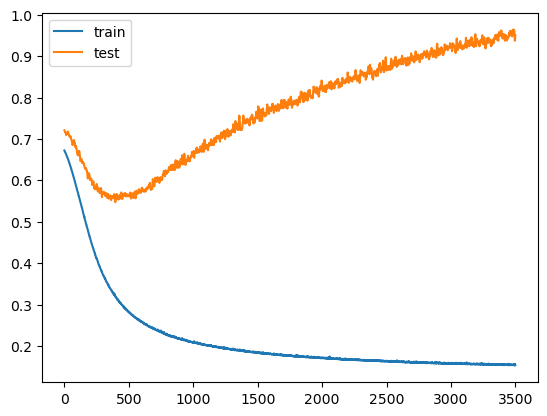

In [40]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 674us/step


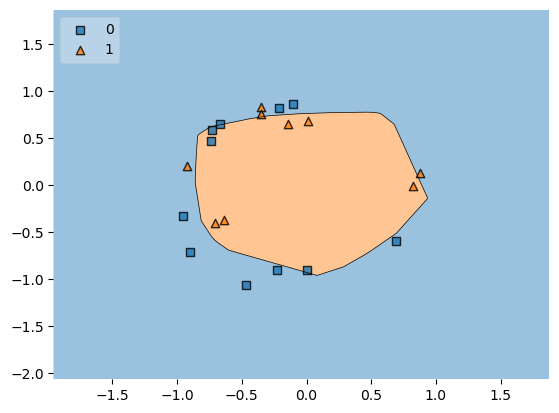

In [41]:
# here now seeing the descenction boundary
plot_decision_regions(x_test,y_test.ravel(), clf = model, legend = 2)
plt.show()

Early Stopping

In [42]:
# now applying the early stopping
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>EarlyStopping Callback Explanation</title>
</head>
<body>
    <h1>EarlyStopping Callback Explanation</h1>
    <p>The <code>EarlyStopping</code> callback in Keras is used to stop training when a monitored metric has stopped improving. Here is an explanation of each parameter in your <code>EarlyStopping</code> callback:</p>
    <ul>
        <li><strong>monitor</strong>: The metric to be monitored. In your case, it's set to <code>'val_loss'</code> which means the validation loss will be monitored.</li>
        <li><strong>min_delta</strong>: The minimum change in the monitored metric to qualify as an improvement. Here, it's set to <code>0.00001</code>.</li>
        <li><strong>patience</strong>: The number of epochs with no improvement after which training will be stopped. You have set it to <code>20</code>.</li>
        <li><strong>verbose</strong>: Verbosity mode. <code>1</code> means that messages will be printed when the callback takes an action.</li>
        <li><strong>mode</strong>: One of {auto, min, max}. In <code>'auto'</code> mode, the direction is automatically inferred from the name of the monitored metric.</li>
        <li><strong>baseline</strong>: Baseline value for the monitored metric. Training will stop if the model doesn't show improvement over the baseline. It's set to <code>None</code>, meaning no baseline is used.</li>
        <li><strong>restore_best_weights</strong>: Whether to restore model weights from the epoch with the best value of the monitored metric. It's set to <code>False</code>, meaning the model weights from the last epoch will be used.</li>
    </ul>
</body>
</html>


In [50]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=327,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5688 - loss: 0.6792 - val_accuracy: 0.4000 - val_loss: 0.7180
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5750 - loss: 0.6736 - val_accuracy: 0.4000 - val_loss: 0.7179
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5906 - loss: 0.6764 - val_accuracy: 0.4500 - val_loss: 0.7171
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5789 - loss: 0.6757 - val_accuracy: 0.5000 - val_loss: 0.7175
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5867 - loss: 0.6744 - val_accuracy: 0.4500 - val_loss: 0.7182
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5945 - loss: 0.6754 - val_accuracy: 0.4500 - val_loss: 0.7190
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6125 - loss: 0.6713 - val_accuracy: 0.4500 - val_loss: 0.7196
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5656 - loss: 0.6800 - val_accuracy: 0.4000 - v

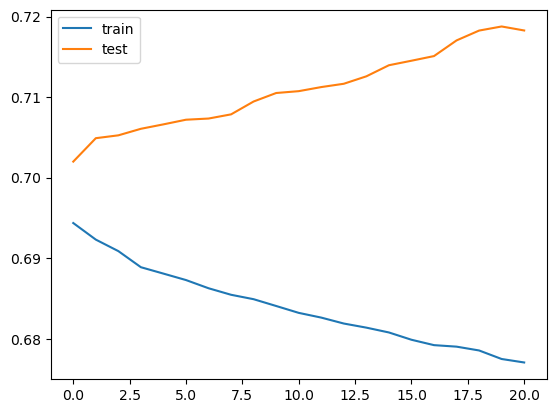

In [46]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 726us/step


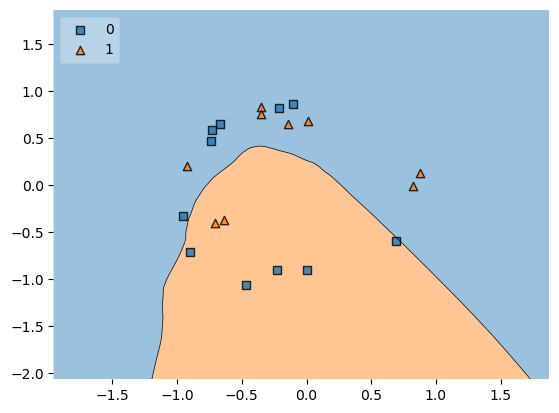

In [49]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()